In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.4 MB 7.2 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

In [ ]:
data = ["2020-01-02","2020-01-03","2020-01-06","2020-01-07","2020-01-08"]
bova = [114.24,113.80,112.59,112.24,111.95]
fesa = [19.79,19.90,19.62,19.69,19.89]
grind =[12.30,12.43,12.28,12.90,12.87]

In [ ]:
dataframe = pd.DataFrame({"data":data,"BOVA":bova,"FESA":fesa,"GRIND":grind})

In [ ]:
bova = yf.download("BOVA11.SA", start='2020-01-02')

[*********************100%***********************]  1 of 1 completed


In [ ]:
bova["Close"].head(11)

Date
2020-01-02    114.239998
2020-01-03    113.800003
2020-01-06    112.589996
2020-01-07    112.239998
2020-01-08    111.949997
2020-01-09    111.660004
2020-01-10    111.279999
2020-01-13    113.080002
2020-01-14    113.320000
2020-01-15    112.180000
2020-01-16    112.349998
Name: Close, dtype: float64

In [ ]:
dataframe.head()

,data,BOVA,FESA,GRIND
0,2020-01-02,114.24,19.79,12.30
1,2020-01-03,113.80,19.90,12.43
2,2020-01-06,112.59,19.62,12.28
3,2020-01-07,112.24,19.69,12.90
4,2020-01-08,111.95,19.89,12.87


In [ ]:
bova = dataframe["BOVA"].copy()

In [ ]:
bova

0    114.24
1    113.80
2    112.59
3    112.24
4    111.95
Name: BOVA, dtype: float64

In [ ]:
bova_normalizado = (bova-np.mean(bova))/np.std(bova)

In [ ]:
bova_normalizado

0    1.423179
1    0.932427
2   -0.417139
3   -0.807509
4   -1.130958
Name: BOVA, dtype: float64

In [ ]:
print(f"""Média: {np.mean(bova_normalizado)}
Desvio padrão:{np.std(bova_normalizado)}""")

Média: -1.580957587066223e-14
Desvio padrão:1.0


In [ ]:
print(f"""Média: {round(np.mean(bova_normalizado),2)}
Desvio padrão:{np.std(bova_normalizado)}""")

Média: -0.0
Desvio padrão:1.0


In [ ]:
colunas = dataframe.columns[1:]
for coluna in colunas:
    print(f"""Ação: {coluna}
          Média: {round(np.mean(dataframe[coluna]),2)}
          Desvio padrão: {round(np.std(dataframe[coluna]),2)}""")

Ação: BOVA
          Média: 112.96
          Desvio padrão: 0.9
Ação: FESA
          Média: 19.78
          Desvio padrão: 0.11
Ação: GRIND
          Média: 12.56
          Desvio padrão: 0.27


In [ ]:
def normaliza(dataframe):
  dataframe_normalizado= dataframe.copy()
  colunas = dataframe.columns[1:]
  for coluna in colunas:
    media = np.mean(dataframe_normalizado[coluna])
    std = np.std(dataframe_normalizado[coluna])
    dataframe_normalizado[coluna] = (dataframe_normalizado[coluna]-media)/std
  
  return dataframe_normalizado


In [ ]:
dataframe_norm = normaliza(dataframe)

In [ ]:
dataframe_norm

,data,BOVA,FESA,GRIND
0,2020-01-02,1.423179,0.109290,-0.935379
1,2020-01-03,0.932427,1.111113,-0.460382
2,2020-01-06,-0.417139,-1.438982,-1.008455
3,2020-01-07,-0.807509,-0.801459,1.256915
4,2020-01-08,-1.130958,1.020038,1.147300


In [ ]:
def calcula(dataframe):
  colunas = dataframe.columns[1:]
  for coluna in colunas:
    print(f"""Ação: {coluna}
          Média: {round(np.mean(dataframe[coluna]),2)}
          Desvio padrão: {round(np.std(dataframe[coluna]),2)}""")

In [ ]:
calcula(dataframe_norm)

Ação: BOVA
          Média: -0.0
          Desvio padrão: 1.0
Ação: FESA
          Média: 0.0
          Desvio padrão: 1.0
Ação: GRIND
          Média: 0.0
          Desvio padrão: 1.0


In [ ]:
dataframe

,data,BOVA,FESA,GRIND
0,2020-01-02,114.24,19.79,12.30
1,2020-01-03,113.80,19.90,12.43
2,2020-01-06,112.59,19.62,12.28
3,2020-01-07,112.24,19.69,12.90
4,2020-01-08,111.95,19.89,12.87


In [ ]:
(dataframe["BOVA"]-np.mean(dataframe["BOVA"]))/(dataframe["BOVA"].max()-dataframe["BOVA"].min())

0    0.557205
1    0.365066
2   -0.163319
3   -0.316157
4   -0.442795
Name: BOVA, dtype: float64

In [ ]:
dataframe.head()

,data,BOVA,FESA,GRIND
0,2020-01-02,114.24,19.79,12.30
1,2020-01-03,113.80,19.90,12.43
2,2020-01-06,112.59,19.62,12.28
3,2020-01-07,112.24,19.69,12.90
4,2020-01-08,111.95,19.89,12.87


In [ ]:
def dimen_media(dataframe):
  dataframe_normalizado= dataframe.copy()
  colunas = dataframe.columns[1:]
  for coluna in colunas:
    media = np.mean(dataframe_normalizado[coluna])
    min = dataframe[coluna].min()
    max = dataframe[coluna].max()
    dataframe_normalizado[coluna] = (dataframe_normalizado[coluna]-media)/(max-min)
  
  return dataframe_normalizado

In [ ]:
dataframe_media = dimen_media(dataframe)

In [ ]:
dataframe_media.head()

,data,BOVA,FESA,GRIND
0,2020-01-02,0.557205,0.042857,-0.412903
1,2020-01-03,0.365066,0.435714,-0.203226
2,2020-01-06,-0.163319,-0.564286,-0.445161
3,2020-01-07,-0.316157,-0.314286,0.554839
4,2020-01-08,-0.442795,0.400000,0.506452


In [ ]:
dataframe_media.describe()

,BOVA,FESA,GRIND
count,5.000000e+00,5.000000e+00,5.000000e+00
mean,-6.172840e-15,5.062617e-15,1.132427e-15
std,4.377345e-01,4.384283e-01,4.935326e-01
min,-4.427948e-01,-5.642857e-01,-4.451613e-01
25%,-3.161572e-01,-3.142857e-01,-4.129032e-01
50%,-1.633188e-01,4.285714e-02,-2.032258e-01
75%,3.650655e-01,4.000000e-01,5.064516e-01
max,5.572052e-01,4.357143e-01,5.548387e-01


# Motivador ações

In [ ]:
bova_df = yf.download("BOVA11.SA", start='2013-01-01',end="2020-02-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
bova_df.shape

(1761, 6)

In [ ]:
bova_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
def min_max(dataframe):
  dataframe_normalizado= dataframe.copy()
  colunas = dataframe.columns[1:]
  for coluna in colunas:
    min = dataframe_normalizado[coluna].min()
    max = dataframe_normalizado[coluna].max()
    dataframe_normalizado[coluna] = (dataframe_normalizado[coluna]-min)/(max-min)
  
  return dataframe_normalizado


In [ ]:
dataframe_min_max = min_max(dataframe)

In [ ]:
dataframe_min_max

,data,BOVA,FESA,GRIND
0,2020-01-02,1.000000,0.607143,0.032258
1,2020-01-03,0.807860,1.000000,0.241935
2,2020-01-06,0.279476,0.000000,0.000000
3,2020-01-07,0.126638,0.250000,1.000000
4,2020-01-08,0.000000,0.964286,0.951613


In [ ]:
dataframe_min_max.describe()

,BOVA,FESA,GRIND
count,5.000000,5.000000,5.000000
mean,0.442795,0.564286,0.445161
std,0.437735,0.438428,0.493533
min,0.000000,0.000000,0.000000
25%,0.126638,0.250000,0.032258
50%,0.279476,0.607143,0.241935
75%,0.807860,0.964286,0.951613
max,1.000000,1.000000,1.000000


In [ ]:
lista =[114.23,113.80,112.58,112.23,111.94,111.66,111.27,113.08,113.32,112.18]

In [ ]:
lista

[114.23, 113.8, 112.58, 112.23, 111.94, 111.66, 111.27, 113.08, 113.32, 112.18]

In [ ]:
sorted(lista)

[111.27, 111.66, 111.94, 112.18, 112.23, 112.58, 113.08, 113.32, 113.8, 114.23]

In [ ]:
acoes = ['BOVA11.SA',"FESA4.SA","GRND3.SA"]

In [ ]:
acoes_df = pd.DataFrame()
for acao in acoes:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
  acoes_df[acao] = yf.download(acao, start='2020-01-02')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
acoes_df.to_csv("acoes.csv")

In [ ]:
dataframe= pd.read_csv("acoes.csv")

In [ ]:
dataframe.head(11)

,Date,BOVA11.SA,FESA4.SA,GRND3.SA
0,2020-01-02,114.239998,19.790001,12.30
1,2020-01-03,113.800003,19.910000,12.43
2,2020-01-06,112.589996,19.620001,12.28
3,2020-01-07,112.239998,19.690001,12.91
4,2020-01-08,111.949997,19.889999,12.87
5,2020-01-09,111.660004,19.510000,12.43
6,2020-01-10,111.279999,19.860001,12.40
7,2020-01-13,113.080002,20.070000,12.30
8,2020-01-14,113.320000,20.400000,12.44
9,2020-01-15,112.180000,21.000000,12.19


In [ ]:
def escala_robusta(dataframe):
  dataframe_normalizado= dataframe.copy()
  colunas = dataframe.columns[1:]
  for coluna in colunas:
    primeiro = dataframe_normalizado[coluna].quantile(0.25)
    terceiro = dataframe_normalizado[coluna].quantile(0.75)
    mediana = dataframe_normalizado[coluna].median()
    dataframe_normalizado[coluna] = (dataframe_normalizado[coluna]-mediana)/(terceiro-primeiro)
  
  return dataframe_normalizado

In [ ]:
dataframe = dataframe.rename(columns={'BOVA11.SA': 'BOVA',"FESA4.SA":"FESA","GRND3.SA":"GRND"})

In [ ]:
dataframe.head(11)

,Date,BOVA,FESA,GRND
0,2020-01-02,114.239998,19.790001,12.30
1,2020-01-03,113.800003,19.910000,12.43
2,2020-01-06,112.589996,19.620001,12.28
3,2020-01-07,112.239998,19.690001,12.91
4,2020-01-08,111.949997,19.889999,12.87
5,2020-01-09,111.660004,19.510000,12.43
6,2020-01-10,111.279999,19.860001,12.40
7,2020-01-13,113.080002,20.070000,12.30
8,2020-01-14,113.320000,20.400000,12.44
9,2020-01-15,112.180000,21.000000,12.19


In [ ]:
data =["2020-01-02","2020-01-03","2020-01-06","2020-01-07","2020-01-08","2020-01-09","2020-01-10","2020-01-13","2020-01-14","2020-01-15","2020-01-16"]
bova = [114.23,	113.80,112.58,112.23,111.94,111.66,111.27,113.08,113.32,112.18,112.34]
fesa = [19.79,19.91,19.62,19.69,19.88,19.51,19.86,20.07,20.40,21.00,21.48]
grnd = [12.30,12.43,12.28,12.91,12.87,12.43,12.40,12.30,12.44,12.19,12.19]

dataframe = pd.DataFrame({"data":data,"BOVA":bova,"FESA":fesa,"GRND":grnd})

In [ ]:
dataframe

,data,BOVA,FESA,GRND
0,2020-01-02,114.23,19.79,12.30
1,2020-01-03,113.80,19.91,12.43
2,2020-01-06,112.58,19.62,12.28
3,2020-01-07,112.23,19.69,12.91
4,2020-01-08,111.94,19.88,12.87
5,2020-01-09,111.66,19.51,12.43
6,2020-01-10,111.27,19.86,12.40
7,2020-01-13,113.08,20.07,12.30
8,2020-01-14,113.32,20.40,12.44
9,2020-01-15,112.18,21.00,12.19


In [ ]:
bova = dataframe["BOVA"].copy()

In [ ]:
bova

0     114.23
1     113.80
2     112.58
3     112.23
4     111.94
5     111.66
6     111.27
7     113.08
8     113.32
9     112.18
10    112.34
Name: BOVA, dtype: float64

In [ ]:
media = round(np.mean(bova),2)
std = round(np.std(bova),4)

In [ ]:
bova_normalizado = round((bova-media)/std,5)

In [ ]:
bova_normalizado

0     1.87486
1     1.38026
2    -0.02300
3    -0.42558
4    -0.75914
5    -1.08121
6    -1.52979
7     0.55210
8     0.82816
9    -0.48309
10   -0.29906
Name: BOVA, dtype: float64

In [ ]:
print(f"""Média: {round(np.mean(bova_normalizado),2)}
 Desvio padrão:{round(np.std(bova_normalizado),2)}""")

Média: 0.0
 Desvio padrão:1.0


In [ ]:
def normaliza(dataframe):
  dataframe_normalizado= dataframe.copy()
  colunas = dataframe.columns[1:]
  for coluna in colunas:
    media = round(np.mean(dataframe_normalizado[coluna]),2)
    std = round(np.std(dataframe_normalizado[coluna]),4)
    dataframe_normalizado[coluna] = (dataframe_normalizado[coluna]-media)/std
  
  return dataframe_normalizado

In [ ]:
dataframe_normalizado = normaliza(dataframe)

In [ ]:
dataframe_normalizado

,data,BOVA,FESA,GRND
0,2020-01-02,1.874856,-0.545238,-0.558179
1,2020-01-03,1.380262,-0.340774,0.000000
2,2020-01-06,-0.023004,-0.834895,-0.644053
3,2020-01-07,-0.425581,-0.715624,2.060970
4,2020-01-08,-0.759144,-0.391890,1.889223
5,2020-01-09,-1.081205,-1.022321,0.000000
6,2020-01-10,-1.529791,-0.425967,-0.128811
7,2020-01-13,0.552105,-0.068155,-0.558179
8,2020-01-14,0.828157,0.494122,0.042937
9,2020-01-15,-0.483092,1.516442,-1.030485


In [ ]:
def calcula(dataframe):
  colunas = dataframe.columns[0:-1]
  for coluna in colunas:
    print(f"""Ação: {coluna}
          Média: {round(np.mean(dataframe[coluna]),2)}
          Desvio padrão: {round(np.std(dataframe[coluna]),2)}""")

In [ ]:
calcula(dataframe_normalizado)

NameError: ignored

In [ ]:
sorted(bova)

[111.27,
 111.66,
 111.94,
 112.18,
 112.23,
 112.34,
 112.58,
 113.08,
 113.32,
 113.8,
 114.23]

In [ ]:
bova

0     114.23
1     113.80
2     112.58
3     112.23
4     111.94
5     111.66
6     111.27
7     113.08
8     113.32
9     112.18
10    112.34
Name: BOVA, dtype: float64

In [ ]:
round((bova- round(np.mean(bova),2))/round(bova.max()-bova.min(),2),5)

0     0.55068
1     0.40541
2    -0.00676
3    -0.12500
4    -0.22297
5    -0.31757
6    -0.44932
7     0.16216
8     0.24324
9    -0.14189
10   -0.08784
Name: BOVA, dtype: float64

In [ ]:
round(bova.max()-bova.min(),2)

2.96

In [ ]:
def dimen_media(dataframe):
  dataframe_normalizado= dataframe.copy()
  colunas = dataframe.columns[1:]
  for coluna in colunas:
    media = round(np.mean(dataframe_normalizado[coluna]),2)
    min = dataframe[coluna].min()
    max = dataframe[coluna].max()
    dataframe_normalizado[coluna] = round((dataframe_normalizado[coluna]-media)/(max-min),5)
  
  return dataframe_normalizado

In [ ]:
dataframe_media = dimen_media(dataframe)

In [ ]:
dataframe_media

,data,BOVA,FESA,GRND
0,2020-01-02,0.55068,-0.16244,-0.18056
1,2020-01-03,0.40541,-0.10152,0.00000
2,2020-01-06,-0.00676,-0.24873,-0.20833
3,2020-01-07,-0.12500,-0.21320,0.66667
4,2020-01-08,-0.22297,-0.11675,0.61111
5,2020-01-09,-0.31757,-0.30457,0.00000
6,2020-01-10,-0.44932,-0.12690,-0.04167
7,2020-01-13,0.16216,-0.02030,-0.18056
8,2020-01-14,0.24324,0.14721,0.01389
9,2020-01-15,-0.14189,0.45178,-0.33333


In [ ]:
bova

0     114.23
1     113.80
2     112.58
3     112.23
4     111.94
5     111.66
6     111.27
7     113.08
8     113.32
9     112.18
10    112.34
Name: BOVA, dtype: float64

In [ ]:
padronizado_min_max=(bova - bova.min())/(bova.max()-bova.min())

In [ ]:
round(padronizado_min_max,5)

0     1.00000
1     0.85473
2     0.44257
3     0.32432
4     0.22635
5     0.13176
6     0.00000
7     0.61149
8     0.69257
9     0.30743
10    0.36149
Name: BOVA, dtype: float64

In [ ]:
bova.min(),bova.max(), bova.max()-bova.min()

(111.27, 114.23, 2.960000000000008)

In [ ]:
def min_max(dataframe):
  dataframe_normalizado= dataframe.copy()
  colunas = dataframe.columns[1:]
  for coluna in colunas:
    min = dataframe_normalizado[coluna].min()
    max = dataframe_normalizado[coluna].max()
    dataframe_normalizado[coluna] = round((dataframe_normalizado[coluna]-min)/(max-min),5)
  
  return dataframe_normalizado

In [ ]:
dataframe_min_max = min_max(dataframe)

In [ ]:
dataframe_min_max

,data,BOVA,FESA,GRND
0,2020-01-02,1.00000,0.14213,0.15278
1,2020-01-03,0.85473,0.20305,0.33333
2,2020-01-06,0.44257,0.05584,0.12500
3,2020-01-07,0.32432,0.09137,1.00000
4,2020-01-08,0.22635,0.18782,0.94444
5,2020-01-09,0.13176,0.00000,0.33333
6,2020-01-10,0.00000,0.17766,0.29167
7,2020-01-13,0.61149,0.28426,0.15278
8,2020-01-14,0.69257,0.45178,0.34722
9,2020-01-15,0.30743,0.75635,0.00000


In [ ]:
dataframe_min_max.describe()

,BOVA,FESA,GRND
count,11.000000,11.000000,11.000000
mean,0.450246,0.304569,0.334595
std,0.308064,0.312462,0.339210
min,0.000000,0.000000,0.000000
25%,0.266890,0.116750,0.138890
50%,0.361490,0.187820,0.291670
75%,0.652030,0.368020,0.340275
max,1.000000,1.000000,1.000000


In [ ]:
bova = yf.download("BOVA11.SA", start='2020-30-30')

## Projeto prático

In [ ]:
google =yf.download("GOGL34.SA",start="2020-01-01", end="2020-12-30")

[*********************100%***********************]  1 of 1 completed


In [ ]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,36.994999,36.994999,36.473331,36.853333,36.853333,42000
2020-01-03,36.853333,37.250000,36.666664,37.150002,37.150002,18000
2020-01-06,36.950001,37.966667,36.950001,37.966667,37.966667,43800
2020-01-07,37.948334,38.224998,37.791664,38.084999,38.084999,108000
2020-01-08,38.000000,38.244999,38.000000,38.200001,38.200001,46200


In [ ]:
acoes = ["GOGL34.SA","ITSA4.SA","BBDC4.SA","BOVA11.SA","PETR3.SA"]
carteira = pd.DataFrame()
for acao in acoes:
  carteira[acao] = yf.download(acao, start='2020-01-02')['Open']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
carteira.head()

,GOGL34.SA,ITSA4.SA,BBDC4.SA,BOVA11.SA,PETR3.SA
Date,,,,,
2020-01-02,36.994999,13.466666,33.209091,112.449997,32.310001
2020-01-03,36.853333,13.523809,33.545452,112.930000,33.000000
2020-01-06,36.950001,13.447619,33.818180,113.000000,32.000000
2020-01-07,37.948334,13.447619,33.409088,112.900002,32.990002
2020-01-08,38.000000,13.285714,33.063637,112.650002,32.700001


In [ ]:
carteira.isnull().mean()

GOGL34.SA    0.0
ITSA4.SA     0.0
BBDC4.SA     0.0
BOVA11.SA    0.0
PETR3.SA     0.0
dtype: float64

In [ ]:
carteira.to_csv("carteira.csv")

In [ ]:
carteira = pd.read_csv("carteira.csv")

In [ ]:
carteira.head()

,Date,GOGL34.SA,ITSA4.SA,BBDC4.SA,BOVA11.SA,PETR3.SA
0,2020-01-02,36.994999,13.466666,33.209091,112.449997,32.310001
1,2020-01-03,36.853333,13.523809,33.545452,112.930000,33.000000
2,2020-01-06,36.950001,13.447619,33.818180,113.000000,32.000000
3,2020-01-07,37.948334,13.447619,33.409088,112.900002,32.990002
4,2020-01-08,38.000000,13.285714,33.063637,112.650002,32.700001


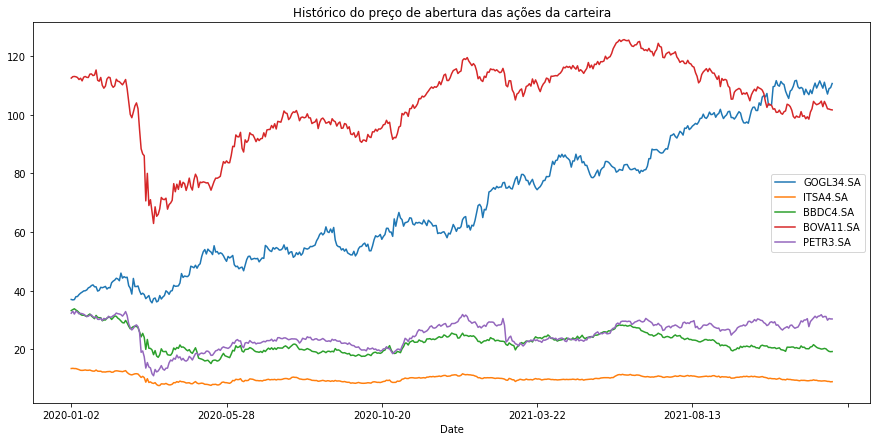

In [ ]:
carteira.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço de abertura das ações da carteira');

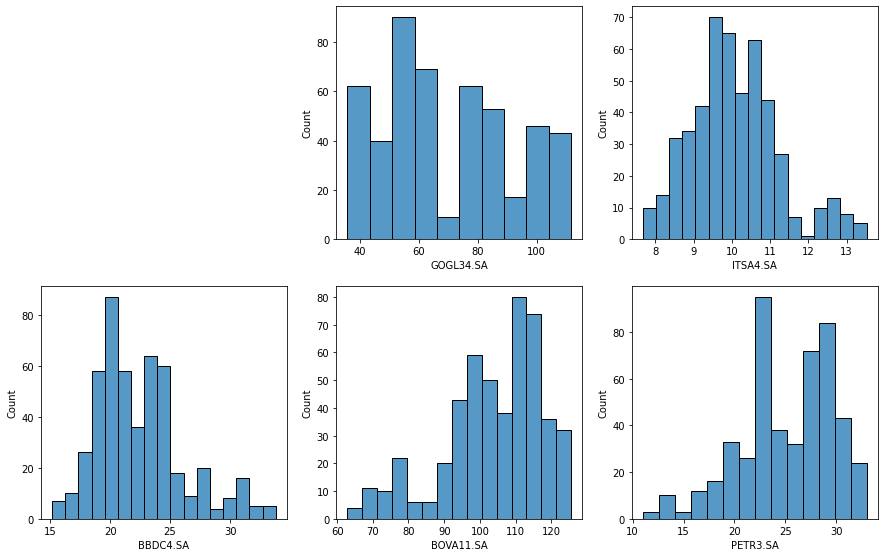

In [ ]:
plt.figure(figsize=(15,30))
i = 1
for i in np.arange(1, len(carteira.columns)):
  plt.subplot(6, 3, i + 1)
  sns.histplot(carteira[carteira.columns[i]], kde = False)

## Normalização com a biblioteca scikit-learn

In [ ]:
carteira.columns

Index(['Date', 'GOGL34.SA', 'ITSA4.SA', 'BBDC4.SA', 'BOVA11.SA', 'PETR3.SA'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
padronizacao = StandardScaler()

In [ ]:
padronizacao.fit(carteira[['GOGL34.SA', 'ITSA4.SA', 'BBDC4.SA', 'BOVA11.SA', 'PETR3.SA']])

StandardScaler()

In [ ]:
carteira_norm = padronizacao.transform(carteira[['GOGL34.SA', 'ITSA4.SA', 'BBDC4.SA', 'BOVA11.SA', 'PETR3.SA']])

In [ ]:
carteira_norm = pd.DataFrame(carteira_norm,columns=['GOGL34.SA', 'ITSA4.SA', 'BBDC4.SA', 'BOVA11.SA', 'PETR3.SA'])

In [ ]:
carteira_norm["Data"] =carteira["Date"]

In [ ]:
print(f"""Médias calculadas pelo StandardScale: {padronizacao.mean_}
Desvios padrão calculados pelo StandardScale: {padronizacao.scale_}  """)

Médias calculadas pelo StandardScale: [ 69.89317354  10.07170746  22.46892573 103.81837566  25.12991851]
Desvios padrão calculados pelo StandardScale: [22.02756701  1.14800167  3.63783608 13.72493372  4.54413389]  


In [ ]:
carteira_norm.describe()

,GOGL34.SA,ITSA4.SA,BBDC4.SA,BOVA11.SA,PETR3.SA
count,4.910000e+02,4.910000e+02,4.910000e+02,4.910000e+02,4.910000e+02
mean,8.307453e-16,-3.152038e-16,2.059905e-16,-8.027071e-18,-1.370255e-16
std,1.001020e+00,1.001020e+00,1.001020e+00,1.001020e+00,1.001020e+00
min,-1.546237e+00,-2.086685e+00,-2.010641e+00,-2.981317e+00,-3.109486e+00
25%,-7.889663e-01,-6.514784e-01,-7.036699e-01,-5.288459e-01,-5.798506e-01
50%,-2.997686e-01,-1.205347e-01,-2.038722e-01,2.325422e-01,1.210532e-01
75%,7.110103e-01,5.846242e-01,4.995929e-01,7.436557e-01,8.076524e-01
max,1.896570e+00,3.007053e+00,3.119782e+00,1.584825e+00,1.731921e+00


In [ ]:
calcula(carteira_norm)

Ação: GOGL34.SA
          Média: 0.0
          Desvio padrão: 1.0
Ação: ITSA4.SA
          Média: -0.0
          Desvio padrão: 1.0
Ação: BBDC4.SA
          Média: 0.0
          Desvio padrão: 1.0
Ação: BOVA11.SA
          Média: -0.0
          Desvio padrão: 1.0
Ação: PETR3.SA
          Média: -0.0
          Desvio padrão: 1.0


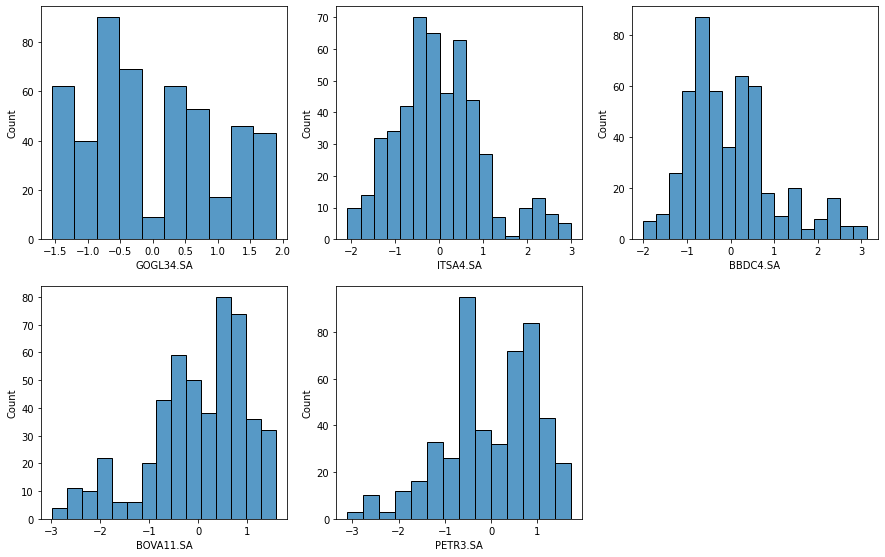

In [ ]:
plt.figure(figsize=(15,30))
i = 1
for i in np.arange(0, len(carteira_norm.columns)-1):
  plt.subplot(6, 3, i + 1)
  sns.histplot(carteira_norm[carteira_norm.columns[i]], kde = False)

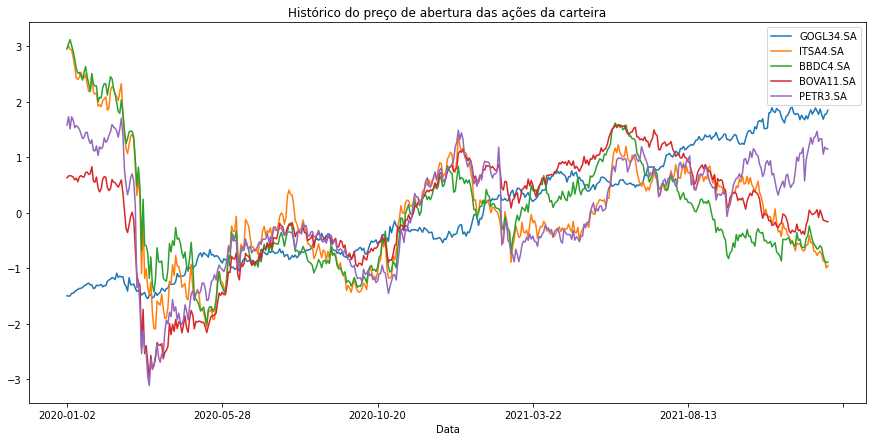

In [ ]:
carteira_norm.plot(x = 'Data', figsize = (15,7), title = 'Histórico do preço de abertura das ações da carteira');

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
robusta = RobustScaler()

In [ ]:
robusta.fit(carteira[['GOGL34.SA', 'ITSA4.SA', 'BBDC4.SA', 'BOVA11.SA', 'PETR3.SA']])

RobustScaler()

In [ ]:
robusta.center_

array([ 63.29000092,   9.9333334 ,  21.72727203, 107.01000214,
        25.68000031])

In [ ]:
robusta.scale_

array([33.04083443,  1.41904783,  4.37727261, 17.46500015,  6.30499935])

In [ ]:
robusta.transform(carteira[['GOGL34.SA', 'ITSA4.SA', 'BBDC4.SA', 'BOVA11.SA', 'PETR3.SA']])

array([[-0.79583347,  2.48993215,  2.62305325,  0.3114798 ,  1.05154667],
       [-0.80012109,  2.53020085,  2.69989584,  0.33896353,  1.16098342],
       [-0.79719537,  2.47650993,  2.76220129,  0.34297153,  1.00237912],
       ...,
       [ 1.37950517, -0.60838943, -0.55451717, -0.2931579 ,  0.76605875],
       [ 1.3885847 , -0.7070467 , -0.57736209, -0.30403694,  0.74226817],
       [ 1.43186449, -0.67181235, -0.56593963, -0.30976259,  0.74068209]])

In [ ]:
dataframe_robusto = pd.DataFrame(carteira, columns=['GOGL34.SA', 'ITSA4.SA', 'BBDC4.SA', 'BOVA11.SA', 'PETR3.SA'])
dataframe_robusto["data"] = carteira["Date"]

In [ ]:
dataframe_robusto.head(10)

,GOGL34.SA,ITSA4.SA,BBDC4.SA,BOVA11.SA,PETR3.SA,data
0,36.994999,13.466666,33.209091,112.449997,32.310001,2020-01-02
1,36.853333,13.523809,33.545452,112.930000,33.000000,2020-01-03
2,36.950001,13.447619,33.818180,113.000000,32.000000,2020-01-06
3,37.948334,13.447619,33.409088,112.900002,32.990002,2020-01-07
4,38.000000,13.285714,33.063637,112.650002,32.700001,2020-01-08
5,38.661667,13.085714,32.527271,111.949997,32.099998,2020-01-09
6,39.148335,12.857142,31.918180,112.400002,32.259998,2020-01-10
7,39.498333,12.828571,31.618181,111.500000,32.150002,2020-01-13
8,39.896667,12.876190,31.663635,112.750000,31.959999,2020-01-14
9,39.970001,12.980952,31.436363,113.000000,31.600000,2020-01-15


In [ ]:
def histograma(dataframe):
  plt.figure(figsize=(15,30))
  i = 1
  for i in np.arange(0, len(dataframe.columns)-1):
    plt.subplot(6, 3, i + 1)
    sns.histplot(dataframe[dataframe.columns[i]], kde = False)

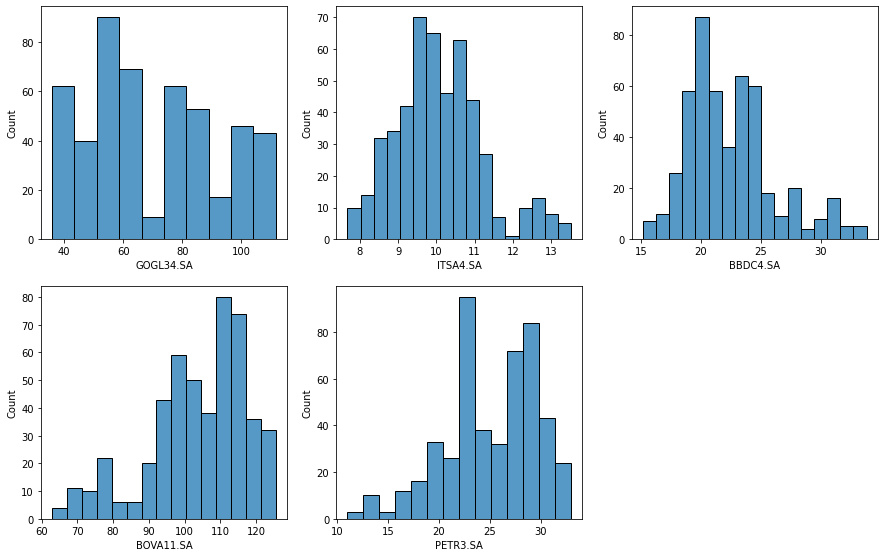

In [ ]:
histograma(dataframe_robusto)

In [ ]:
def grafico(dataframe, data):
  dataframe.plot(x = data, figsize = (15,7), title = 'Histórico do preço de abertura das ações da carteira');

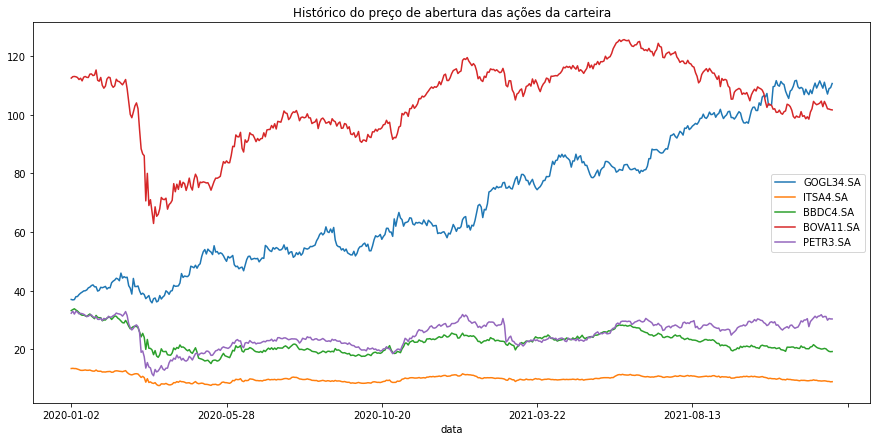

In [ ]:
grafico(dataframe_robusto,"data")

In [ ]:
standardscaler = StandardScaler(with_mean=True, with_std=False)
robustscaler = RobustScaler(with_centering=False,with_scaling=True, quantile_range=(0,100))

In [ ]:
standardscaler.fit(carteira[['GOGL34.SA', 'ITSA4.SA', 'BBDC4.SA', 'BOVA11.SA', 'PETR3.SA']])
robustscaler.fit(carteira[['GOGL34.SA', 'ITSA4.SA', 'BBDC4.SA', 'BOVA11.SA', 'PETR3.SA']])

RobustScaler(quantile_range=(0, 100), with_centering=False)

In [ ]:
dataframe_media = standardscaler.transform(robustscaler.transform(carteira[['GOGL34.SA', 'ITSA4.SA', 'BBDC4.SA', 'BOVA11.SA', 'PETR3.SA']]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
dataframe_media = pd.DataFrame(dataframe_media,columns=['GOGL34.SA', 'ITSA4.SA', 'BBDC4.SA', 'BOVA11.SA', 'PETR3.SA'])

In [ ]:
dataframe_media["data"] = carteira["Date"]

In [ ]:
dataframe_media.head(10)

,GOGL34.SA,ITSA4.SA,BBDC4.SA,BOVA11.SA,PETR3.SA,data
0,-69.405349,-7.768776,-20.689578,-102.024056,-23.661282,2020-01-02
1,-69.407217,-7.759004,-20.671556,-102.016397,-23.629919,2020-01-03
2,-69.405942,-7.772033,-20.656943,-102.015280,-23.675373,2020-01-06
3,-69.392778,-7.772033,-20.678862,-102.016876,-23.630373,2020-01-07
4,-69.392097,-7.799721,-20.697372,-102.020865,-23.643555,2020-01-08
5,-69.383372,-7.833923,-20.726110,-102.032035,-23.670828,2020-01-09
6,-69.376954,-7.873011,-20.758745,-102.024854,-23.663555,2020-01-10
7,-69.372339,-7.877897,-20.774819,-102.039215,-23.668555,2020-01-13
8,-69.367087,-7.869753,-20.772384,-102.019269,-23.677191,2020-01-14
9,-69.366120,-7.851838,-20.784561,-102.015280,-23.693555,2020-01-15


In [ ]:
calcula(dataframe_media)

Ação: GOGL34.SA
          Média: -68.97
          Desvio padrão: 0.29
Ação: ITSA4.SA
          Média: -8.35
          Desvio padrão: 0.2
Ação: BBDC4.SA
          Média: -21.27
          Desvio padrão: 0.19
Ação: BOVA11.SA
          Média: -102.16
          Desvio padrão: 0.22
Ação: PETR3.SA
          Média: -23.99
          Desvio padrão: 0.21


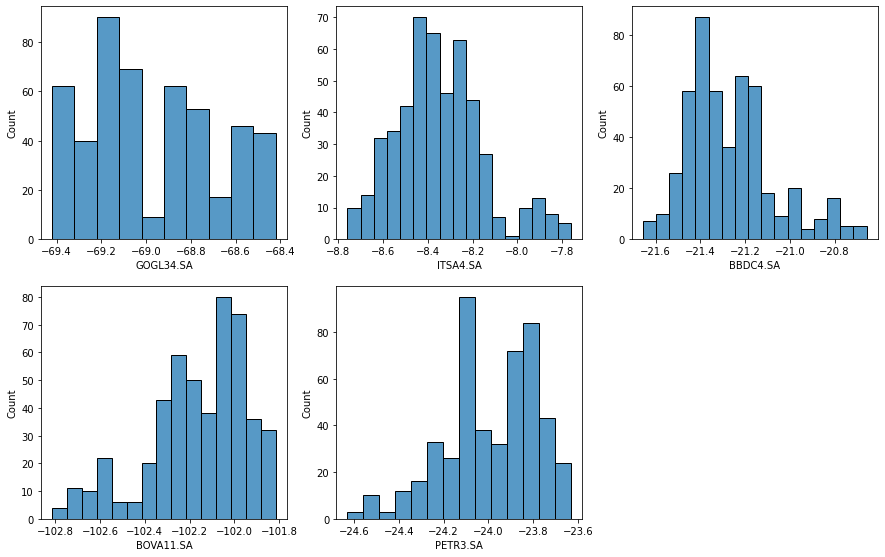

In [ ]:
histograma(dataframe_media)

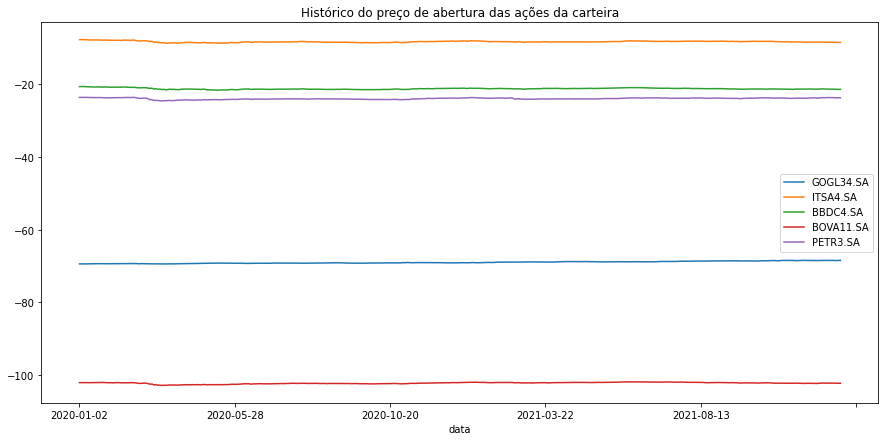

In [ ]:
grafico(dataframe_media, "data")